In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/future-jobs-and-skills-demand-2025/future_jobs_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/future-jobs-and-skills-demand-2025/future_jobs_dataset.csv")
df.head()

,job_id,job_title,industry,location,salary_usd,skills_required,remote_option,company_size,posting_date
0,1,Quantum Researcher,Quantum Computing,Singapore,175780,"Linear Algebra, Quantum Algorithms",No,Large,2025-07-22
1,2,Renewable Energy Engineer,Green Tech,Singapore,137481,"Climate Data Analysis, Energy Modeling",Yes,Large,2025-09-26
2,3,Quantum Researcher,Quantum Computing,Tokyo,182081,"Linear Algebra, Qiskit",No,Medium,2025-12-31
3,4,Sustainability Analyst,Green Tech,Singapore,113822,"Climate Data Analysis, Energy Modeling",No,Large,2025-05-29
4,5,Smart Contract Engineer,Blockchain,London,92575,"Rust, Solidity",Yes,Small,2025-03-30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_id           10000 non-null  int64 
 1   job_title        10000 non-null  object
 2   industry         10000 non-null  object
 3   location         10000 non-null  object
 4   salary_usd       10000 non-null  int64 
 5   skills_required  10000 non-null  object
 6   remote_option    10000 non-null  object
 7   company_size     10000 non-null  object
 8   posting_date     10000 non-null  object
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


### Checking if there exists any null values

In [4]:
df.isnull().sum()

job_id             0
job_title          0
industry           0
location           0
salary_usd         0
skills_required    0
remote_option      0
company_size       0
posting_date       0
dtype: int64

In [5]:
df.shape

(10000, 9)

In [6]:
df['industry'].unique()

array(['Quantum Computing', 'Green Tech', 'Blockchain', 'AI'],
      dtype=object)

### Salary analysis by industry

In [7]:
df['industry'].unique()

array(['Quantum Computing', 'Green Tech', 'Blockchain', 'AI'],
      dtype=object)

In [8]:
df['salary_usd'].unique()

array([175780, 137481, 182081, ..., 200382, 214484, 117307])

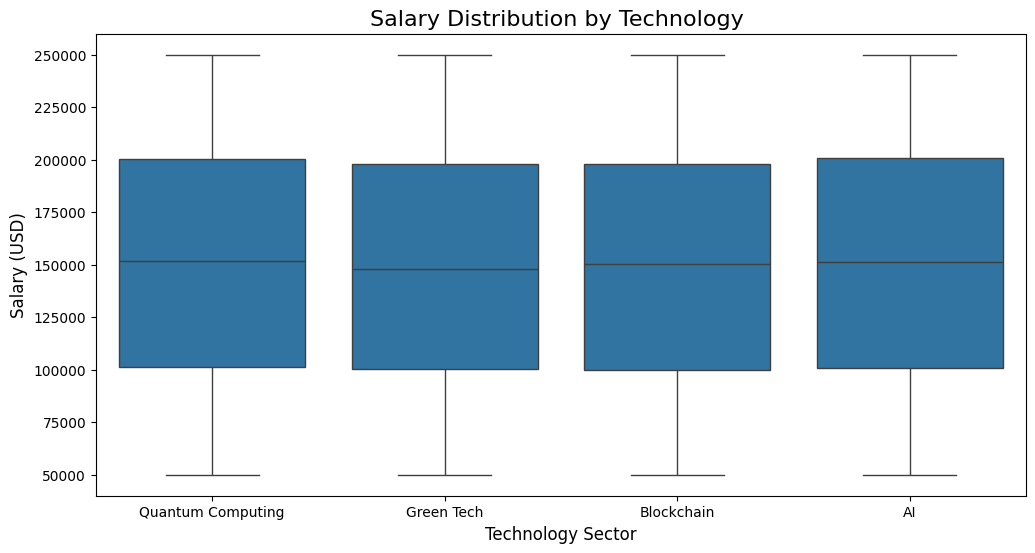

In [9]:

plt.figure(figsize=(12, 6))

# Plotting Salary vs Industry
sns.boxplot(data=df, x='industry', y='salary_usd')


plt.title("Salary Distribution by Technology ", fontsize=16)
plt.xlabel("Technology Sector", fontsize=12)
plt.ylabel("Salary (USD)", fontsize=12)

plt.show()

Salary distribution by technology based on the above box plot: we can say that the salary ranges similarly across different technologies, with some variations in median salaries and interquartile ranges.

### Remote vs Onsite

Text(0, 0.5, 'Count')

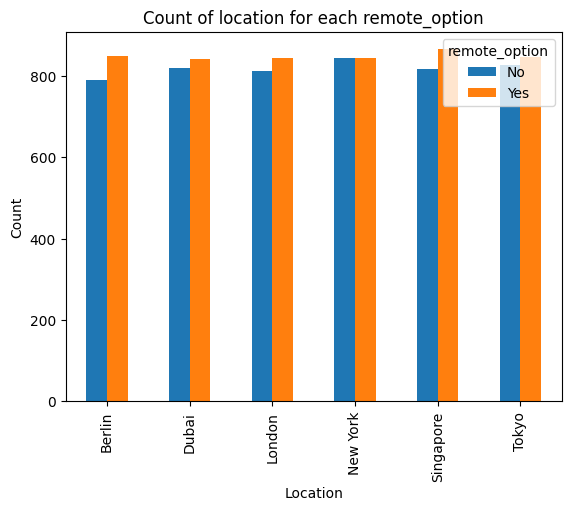

In [10]:
count = pd.crosstab(df['location'],df['remote_option'])
count.plot(kind='bar')
plt.title("Count of location for each remote_option")
plt.xlabel("Location")
plt.ylabel("Count")

- For each location remote options are more compared to the onsite options.

### Company size vs salary

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_id           10000 non-null  int64 
 1   job_title        10000 non-null  object
 2   industry         10000 non-null  object
 3   location         10000 non-null  object
 4   salary_usd       10000 non-null  int64 
 5   skills_required  10000 non-null  object
 6   remote_option    10000 non-null  object
 7   company_size     10000 non-null  object
 8   posting_date     10000 non-null  object
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


In [12]:
df['company_size'].value_counts()

company_size
Large     3385
Medium    3328
Small     3287
Name: count, dtype: int64

In [13]:
order = ['Small', 'Medium', 'Large']
df['company_size'] = pd.Categorical(df['company_size'], categories=order, ordered=True)

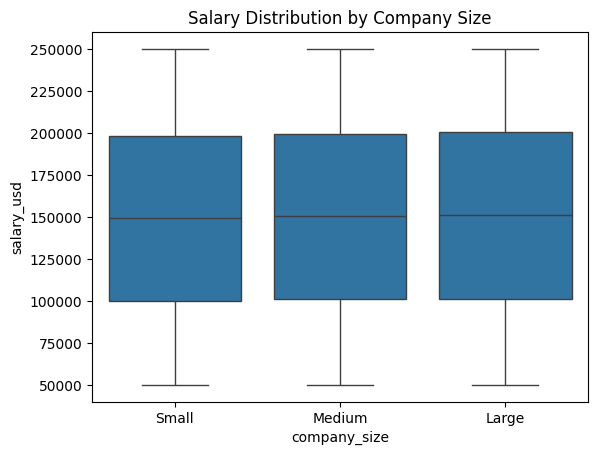

In [14]:
sns.boxplot(x='company_size', y='salary_usd', data=df, order=order)
plt.title('Salary Distribution by Company Size')
plt.show()

In [15]:
trend = (
    df.groupby('company_size')['salary_usd']
      .mean()
      .reset_index()
)

/tmp/ipykernel_17/2508205541.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('company_size')['salary_usd']


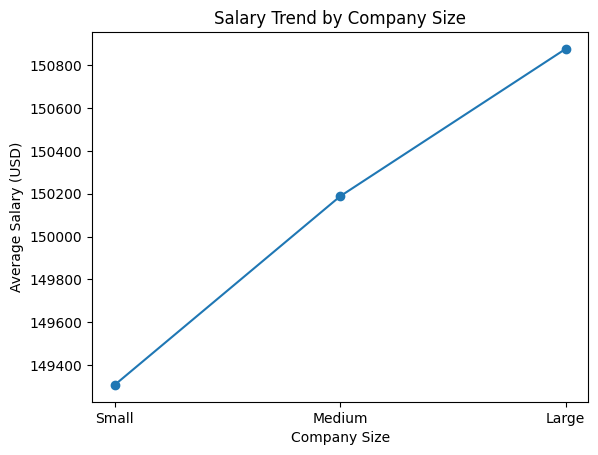

In [16]:
plt.plot(trend['company_size'], trend['salary_usd'], marker='o')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.title('Salary Trend by Company Size')
plt.show()

Analysing the salary trend based on company size:
- for small companies the mean salary is 149400 usd
- for medium companies the mean salary is 150200 usd
- for large companies the mean salary is 150800 usd

### Skills demand trend

In [17]:
df['skills_required'].value_counts()

skills_required
Energy Modeling, Climate Data Analysis    1255
Climate Data Analysis, Energy Modeling    1235
Ethereum, Solidity                         454
Python, TensorFlow                         439
Quantum Algorithms, Qiskit                 435
Quantum Algorithms, Linear Algebra         424
Linear Algebra, Qiskit                     424
TensorFlow, PyTorch                        424
Qiskit, Quantum Algorithms                 418
Ethereum, Rust                             417
TensorFlow, Python                         416
Linear Algebra, Quantum Algorithms         413
Rust, Ethereum                             413
PyTorch, TensorFlow                        411
Solidity, Rust                             409
Rust, Solidity                             407
Qiskit, Linear Algebra                     405
Python, PyTorch                            404
Solidity, Ethereum                         399
PyTorch, Python                            398
Name: count, dtype: int64

<Axes: xlabel='industry', ylabel='count'>

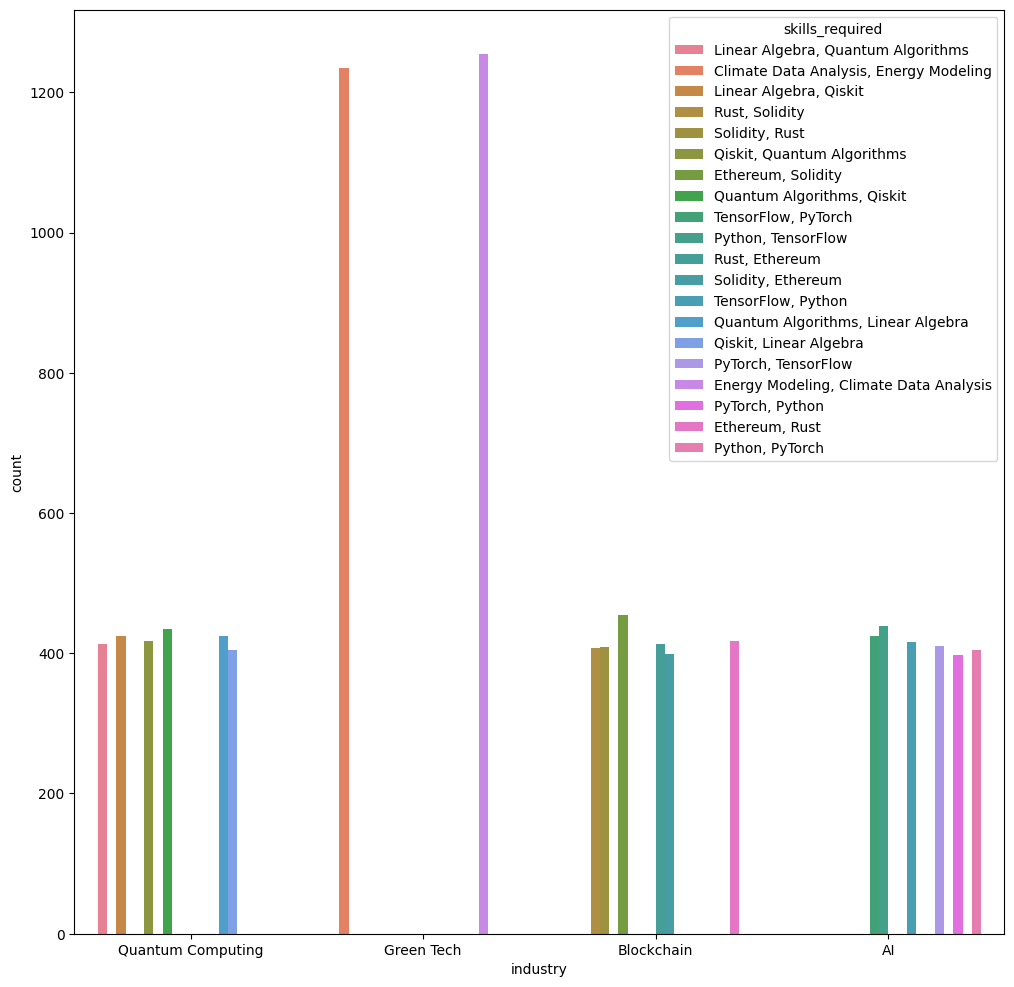

In [18]:
plt.figure(figsize = (12,12))
sns.countplot(x = 'industry',hue='skills_required',data = df)

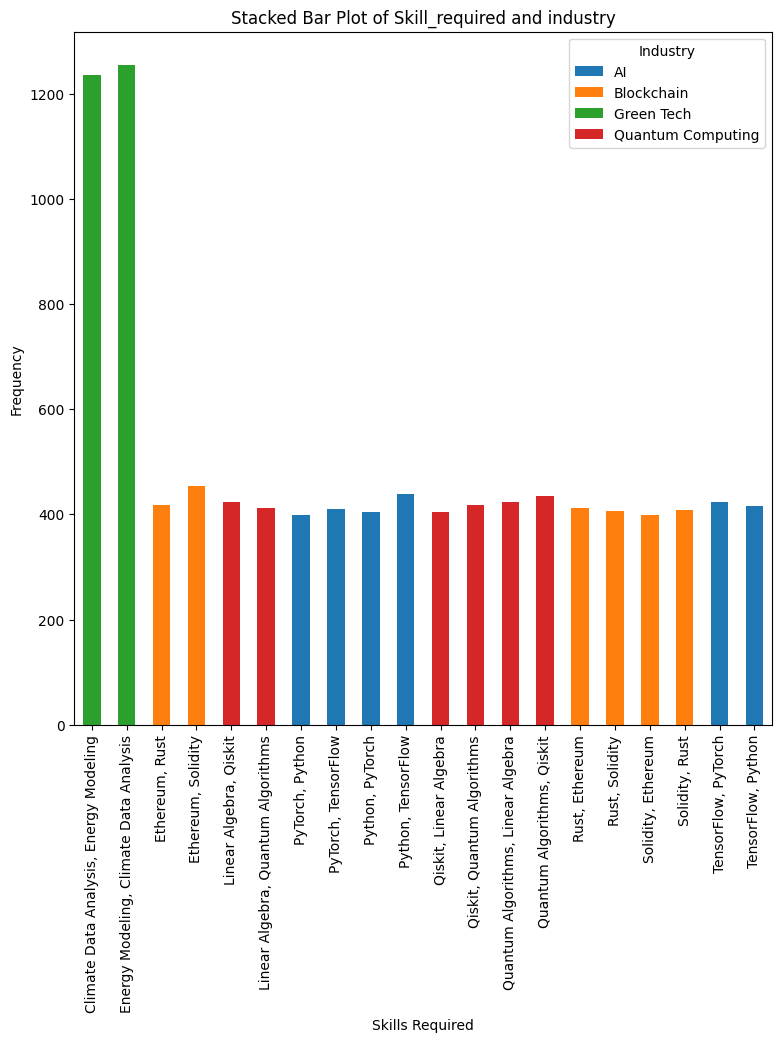

In [19]:
contingency_table = pd.crosstab(df['skills_required'],df['industry'])
contingency_table.plot(kind = 'bar',stacked = True,figsize = (9,9))
plt.title('Stacked Bar Plot of Skill_required and industry')
plt.xlabel('Skills Required')
plt.ylabel('Frequency')
plt.legend(title='Industry')

plt.show()

Analysing the skills trend per industry:
- for green tech: the required skills are climate data analysis, energy modeling
- for block chain: the required skills are ethereum, rust and solidity
- for ai: the required skills are python, pytorch, scikit-learn, tensorflow
- for quantum computing: the required skills are quantum algorithms, qiskit, and linear algebra